<a href="https://colab.research.google.com/github/chandansinghthakur/Time_series/blob/main/time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from pandas.core.generic import InvalidIndexError
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime

In [12]:
url = "https://raw.githubusercontent.com/chandansinghthakur/Time_series/main/PH-Sales.csv"
df = pd.read_csv(url)

In [13]:
df.head(12)

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203
5,Jun-03,189
6,Jul-03,207
7,Aug-03,207
8,Sep-03,171
9,Oct-03,150


In [14]:
len(df['Month-Year'])

144

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Month-Year              144 non-null    object
 1   Number of Tractor Sold  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [16]:
pd.date_range(start='1/1/2018', periods=8)

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08'],
              dtype='datetime64[ns]', freq='D')

In [17]:
pd.date_range(start='2022-10-13', periods=10)

DatetimeIndex(['2022-10-13', '2022-10-14', '2022-10-15', '2022-10-16',
               '2022-10-17', '2022-10-18', '2022-10-19', '2022-10-20',
               '2022-10-21', '2022-10-22'],
              dtype='datetime64[ns]', freq='D')

In [20]:
dates= pd.date_range(start='2003-01-01', freq='MS', periods=len(df))

In [21]:
len(dates)

144

In [22]:
dates

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

In [23]:
dates.month

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
             3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
           dtype='int64', length=144)

In [24]:
dates.year

Int64Index([2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003,
            ...
            2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014],
           dtype='int64', length=144)

In [25]:
df['Month']= dates.month
df['Year']=dates.year

In [27]:
df.head()

,Month-Year,Number of Tractor Sold,Month,Year
0,Jan-03,141,1,2003
1,Feb-03,157,2,2003
2,Mar-03,185,3,2003
3,Apr-03,199,4,2003
4,May-03,203,5,2003


In [32]:
import calendar
calendar.month_abbr

In [34]:
df['month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])

In [35]:
df.head()

,Month-Year,Number of Tractor Sold,Month,Year,month
0,Jan-03,141,1,2003,Jan
1,Feb-03,157,2,2003,Feb
2,Mar-03,185,3,2003,Mar
3,Apr-03,199,4,2003,Apr
4,May-03,203,5,2003,May


In [36]:
df.rename(columns={'Number of Tractor Sold' : 'Tractor-sale'}, inplace=True)

In [37]:
df.head()

,Month-Year,Tractor-sale,Month,Year,month
0,Jan-03,141,1,2003,Jan
1,Feb-03,157,2,2003,Feb
2,Mar-03,185,3,2003,Mar
3,Apr-03,199,4,2003,Apr
4,May-03,203,5,2003,May


In [38]:
dates

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

In [39]:
df.set_axis(dates, inplace=True)

In [40]:
df.head()

,Month-Year,Tractor-sale,Month,Year,month
2003-01-01,Jan-03,141,1,2003,Jan
2003-02-01,Feb-03,157,2,2003,Feb
2003-03-01,Mar-03,185,3,2003,Mar
2003-04-01,Apr-03,199,4,2003,Apr
2003-05-01,May-03,203,5,2003,May


In [41]:
df = df[["Tractor-sale", "month", "Year"]]

In [43]:
df.head()

,Tractor-sale,month,Year
2003-01-01,141,Jan,2003
2003-02-01,157,Feb,2003
2003-03-01,185,Mar,2003
2003-04-01,199,Apr,2003
2003-05-01,203,May,2003


In [44]:
ts_sale = df['Tractor-sale']

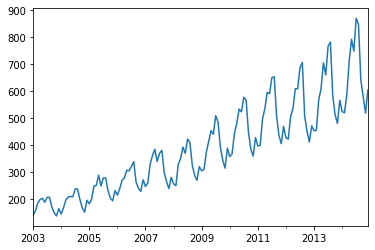

In [47]:
ts_sale.plot()

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(ts_sale)

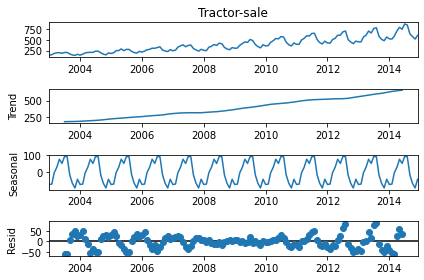

In [50]:
decompose.plot();